In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
!ls ../../data/outs/

dmrs_annotated.tsv		      human_cell_type_hyper_dmr_info.tsv
dmrs_annotated_with_levels_march.tsv  human_cell_type_hypo_dmr_info.tsv
dmrs_annotated_with_levels.tsv	      level_2_hyper.tsv
dmrs_final_annot.tsv		      level_2_hypo.tsv
dmrs_level1.tsv			      mcg_entropy_based_specificity.tsv
human_cell_type_dmr_info.tsv


In [4]:
annot_path = '../../data/outs/dmrs_final_annot.tsv'
annot = pd.read_csv(annot_path, sep='\t').set_index('3')

In [5]:
annot.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,mammal_level2,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN


In [6]:
n_ortholog = annot.mammal_level0.sum()

In [7]:
n_ortholog_p = annot.primate_level0.sum()

In [8]:
n_ortholog, n_ortholog_p

(579026, 519456)

In [98]:
annot['human_specific'].sum()

54829

In [9]:
n_active = annot.shape[0]

In [10]:
specific = annot.human_specific.sum()

In [11]:
active_non_ortho = n_active - n_ortholog - n_ortholog_p

In [12]:
out_l0 = '../../figures/level0_barplot.pdf'

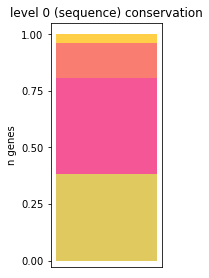

In [13]:
fig, ax = plt.subplots(figsize=(2, 4.5))
ax.bar(1, (n_active - specific)/n_active, color='#F97D70')
ax.bar(1, specific/n_active, bottom=(n_active- specific)/n_active, color='#FFCF48')
ax.bar(1, n_ortholog/n_active,bottom=n_ortholog_p/n_active, color='#F45696')
ax.bar(1, n_ortholog_p/n_active, color='#E0CA5F')
# ax.bar(1, active_ortho, color='#E0CA5F')
_ = ax.set_xticks([])
ax.set_title('level 0 (sequence) conservation')
ax.set_ylabel('n genes')
ax.set_ylim(-.03, 1.05)
ax.set_yticks([0, .25, .50, .75, 1])
plt.savefig(out_l0, transparent=True, dpi=400, bbox_inches='tight')

In [14]:
n_active - specific -n_ortholog -n_ortholog_p, n_ortholog, n_ortholog_p

(208647, 579026, 519456)

In [15]:
n_active

1361958

In [16]:
[i for i in annot.columns if 'level1' in i]

['macaque_level1',
 'marmoset_level1',
 'mouse_level1',
 'mammal_level1',
 'primate_level1']

In [17]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [18]:
[annot['{}_level1'.format(i)].sum() for i in species[1:]]

[664352, 504924, 365984]

In [19]:
out_l1 = '../../figures/level1_dmr_barplot.pdf'

In [20]:
import matplotlib.ticker as mtick

# level 1 barplots

In [21]:
annot_use = annot.loc[annot.mammal_level0]

In [22]:
annot_use = annot.loc[annot.mammal_level0 | annot.primate_level0]

In [23]:
annot_use.shape

(1098482, 63)

In [24]:
annot_use.mammal_level1.sum()

195435

In [25]:
annot_use.mouse_level1.sum()

365984

In [41]:
total

1098482

In [42]:
check = [total/total * 100] * 2 + [(annot_use.mammal_level0.sum()/total) * 100]

In [43]:
check

[100.0, 100.0, 52.711469100085395]

In [58]:
annot.primate_level1.sum(), annot.mammal_level1.sum()

(396850, 195435)

In [59]:
(annot.primate_level1 & ~annot.mammal_level1).sum()

201415

In [60]:
annot.primate_level2.sum(), annot.mammal_level2.sum()

(343711, 144156)

In [61]:
(annot.primate_level2 & ~annot.mammal_level2).sum()

199555

In [64]:
annot.mammal_level0.sum(), annot.primate_level0.sum() + annot.mammal_level0.sum()

(579026, 1098482)

In [66]:
annot.primate_level0.sum()

519456

In [65]:
annot.shape

(1361958, 63)

In [99]:
annot.mammal_level3 

23414

In [101]:
annot.te_annot

AttributeError: 'DataFrame' object has no attribute 'te_annot'

In [100]:
annot.primate_level3.sum()

64138

In [45]:
(annot[['{}_level1'.format(i) for i in species[1:]]].sum(axis=1) > 2).sum()

195435

In [46]:
annot.primate_level1.sum()

396850

In [47]:
(annot[['{}_level1'.format(i) for i in species[1:2]]].sum(axis=1) > 1).sum()

0

In [48]:
(annot['marmoset_level1'] & annot.macaque_level1).sum()

396850

In [49]:
annot['primate_level1'] = annot['marmoset_level1'] & annot.macaque_level1

In [50]:
((annot[['{}_level1'.format(i) for i in species[1:3]]].sum(axis=1) > 1) & ~(annot[['{}_level1'.format(i) for i in species[1:]]].sum(axis=1) > 2)).sum()

201415

In [51]:
annot_use = annot.loc[annot.mammal_level0]

In [57]:
annot.loc['level1_mammal'].sum()

KeyError: 'level1_mammal'

In [52]:
out_l1 = '../../figures/level1_dmr_barplot_{}.pdf'

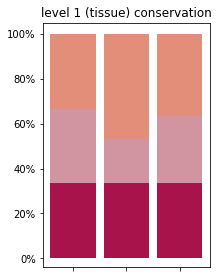

In [53]:
fig, ax = plt.subplots(figsize=(3, 4.5))
total = annot_use.shape[0]
ax.bar([1,2,3], [100] * 3, width=.85, color='#E28E78',)
ax.bar([1, 2, 3], [annot_use['{}_level1'.format(i)].sum()/total * 100 for i in species[1:]], width =.85,
       color='#D195A1')
# ax.bar([1, 2], [annot['primate_level1'].sum()/n_ortholog * 100] *2, color='#D46888')
ax.set_xticks([1, 2, 3], labels=['']*3)
# ax.bar([1, 2], [annot_use['primate_level1'].sum()/total * 100] *2,
#        width=.85, color ='#D46888')
ax.bar([1, 2, 3], [annot_use['mammal_level1'].sum()/total * 100]*3, color='#A8134C', width =.85,)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('level 1 (tissue) conservation')
ax.set_ylim(-4, 105)
plt.savefig(out_l1.format('mammal'), transparent=True, dpi=400, bbox_inches='tight')

In [54]:
annot_use = annot.loc[annot.mammal_level0 | annot.primate_level0]

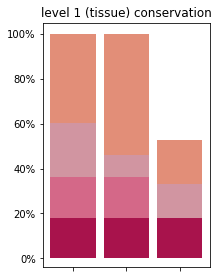

In [55]:
fig, ax = plt.subplots(figsize=(3, 4.5))
total = annot_use.shape[0]
ax.bar([1,2,3], check , width=.85, color='#E28E78',)
ax.bar([1, 2, 3], [annot_use['{}_level1'.format(i)].sum()/total * 100 for i in species[1:]], width =.85,
       color='#D195A1')
# ax.bar([1, 2], [annot['primate_level1'].sum()/n_ortholog * 100] *2, color='#D46888')
ax.set_xticks([1, 2, 3], labels=['']*3)
ax.bar([1, 2], [annot_use['primate_level1'].sum()/total * 100] *2,
       width=.85, color ='#D46888')
ax.bar([1, 2, 3], [annot_use['mammal_level1'].sum()/total * 100]*3, color='#A8134C', width =.85,)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('level 1 (tissue) conservation')
ax.set_ylim(-4, 105)
plt.savefig(out_l1.format('primate'), transparent=True, dpi=400, bbox_inches='tight')

In [122]:
annot['primate_level1'] = annot['macaque_level1'] & annot['marmoset_level1']

In [123]:
annot['primate_level1'].sum()

396850

In [124]:
annot.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,mammal_level2,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN


In [110]:
# [i for i in annot.columns if 'level2' in i]

In [130]:
dmrs_per = {'Astro': 689726,
 'CLA': 197637,
 'L23': 867760,
 'L4': 533195,
 'L5-ET': 110542,
 'L5-IT': 461965,
 'L6-CT': 270189,
 'L6-IT': 439141,
 'L6b': 303530,
 'Lamp5': 318669,
 'MG': 892692,
 'NP': 129256,
 'ODC': 1048399,
 'OPC': 349794,
 'Pvalb-BC': 472942,
 'Pvalb-ChC': 101557,
 'Sncg': 134070,
 'Sst': 467751,
 'Vip': 409910,
 'Vsc': 572737,}

In [131]:
clusts = [i for  i in dmrs_per.keys()]

In [132]:
cell_dmr_info = pd.read_csv('../../data/outs/human_cell_type_dmr_info.tsv', sep='\t')

In [139]:
l2_hyper = pd.read_csv('../../data/outs/level_2_hyper.tsv', sep='\t')
l2_hypo =pd.read_csv('../../data/outs/level_2_hypo.tsv', sep='\t')

In [152]:
cell_order = ['Vip',
 'Sncg',
 'Lamp5',
 'Sst',
 'Pvalb-BC',
 'Pvalb-ChC',
 'L23',
 'L4',
 'L5-IT',
 'L6-IT',
 'CLA',
 'L5-ET',
 'NP',
 'L6-CT',
 'L6b',
 'Vsc',
 'MG',
 'OPC',
 'ODC',
 'Astro']

In [157]:
active = []
ortho = []
cons = []
celltype = []
species_list = []
order = []
for specie in species[1:]:
    for clust in clusts:
        celltype.append(clust)
        species_list.append(specie)
        active.append(cell_dmr_info[clust].sum())
        ortho.append(
            (cell_dmr_info[clust]& 
             cell_dmr_info['level0_{}'.format(specie)]).sum())
        cons.append( (l2_hyper['{}_{}'.format(clust, specie)] | l2_hypo['{}_{}'.format(clust, specie)]).sum() )  
        order.append(cell_order.index(clust) + 1)

In [158]:
for_circle_plot = pd.DataFrame(data=np.array([active, ortho, cons, species_list, celltype, order]).T,
                               columns = ['all', 'ortho', 'cons', 'species', 'celltype', 'order'])

In [159]:
for_circle_plot.to_csv('../../data/for_figures/circle_plot_info.tsv', sep='\t', index=None)

In [160]:
for_circle_plot.head()

,all,ortho,cons,species,celltype,order
0,689726,652356,177511,macaque,Astro,20
1,197637,187589,24990,macaque,CLA,11
2,867760,815590,276561,macaque,L23,7
3,533195,501550,168464,macaque,L4,8
4,110542,104745,5680,macaque,L5-ET,12


In [73]:
!head ../../../data/for_figures/fig2_gex/circle_plot_info.tsv

all	ortho	cons	species	celltype
9908	8988	7877	macaque	ASC
8988	8198	5867	macaque	ChC
6347	5810	4582	macaque	Endo
9747	8889	7228	macaque	L2_3_IT
9735	8871	7193	macaque	L4_5_IT
9509	8639	7176	macaque	L5_6_NP
9071	8259	6844	macaque	L5_ET
9624	8741	7082	macaque	L5_IT
9505	8643	7116	macaque	L6b


In [99]:
annot.human_biased.sum(), annot.mammal_level3.sum(), annot.primate_level3.sum()

(1763, 2689, 2638)